## Question 6: What factors about an individual would contribute to their yearly compensation?

In [1]:
# import the necessary libraries for this question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./Data/survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Let's first look at the quantitative variables and 
# then use LinearRegression to predict the yearly compensation
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


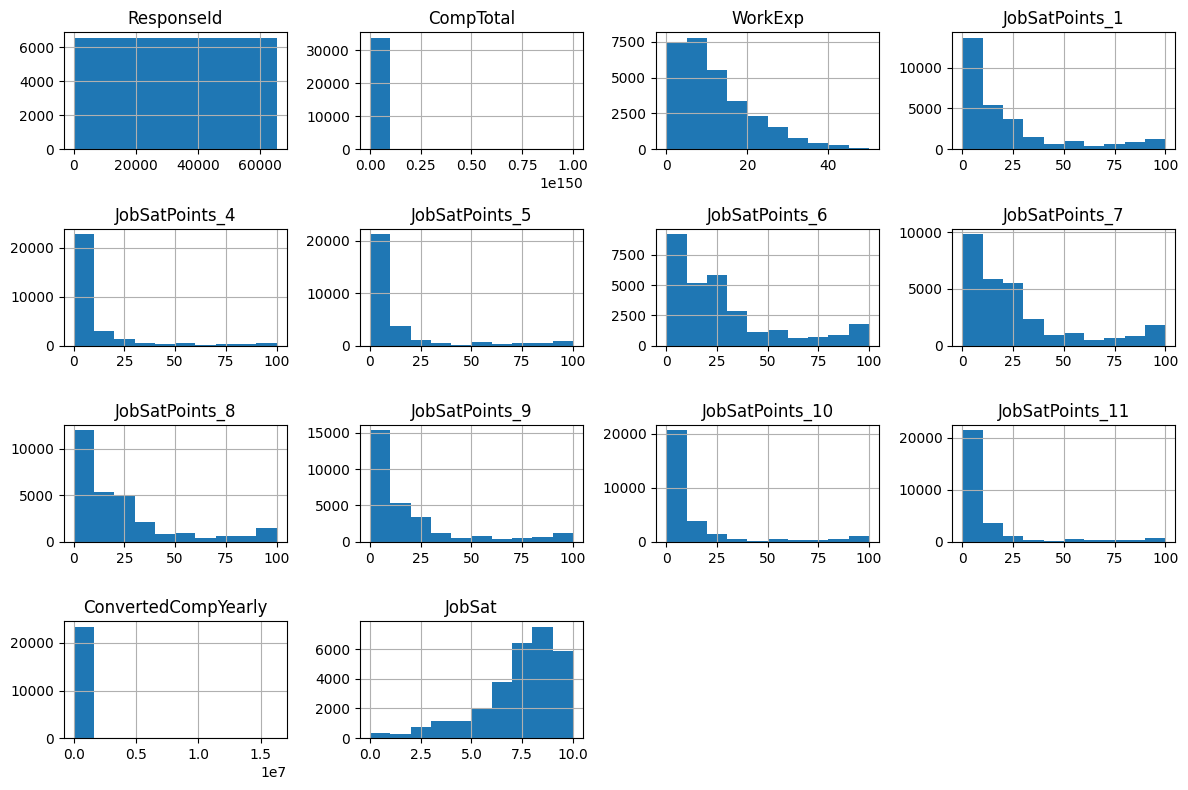

In [4]:
# Take a look at the histogram of these columns above
df.hist(figsize = (12, 8));
plt.tight_layout()
plt.show()

In [5]:
# Take a look at the heatmap matrix of these numeric columns
print(df.dtypes)

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


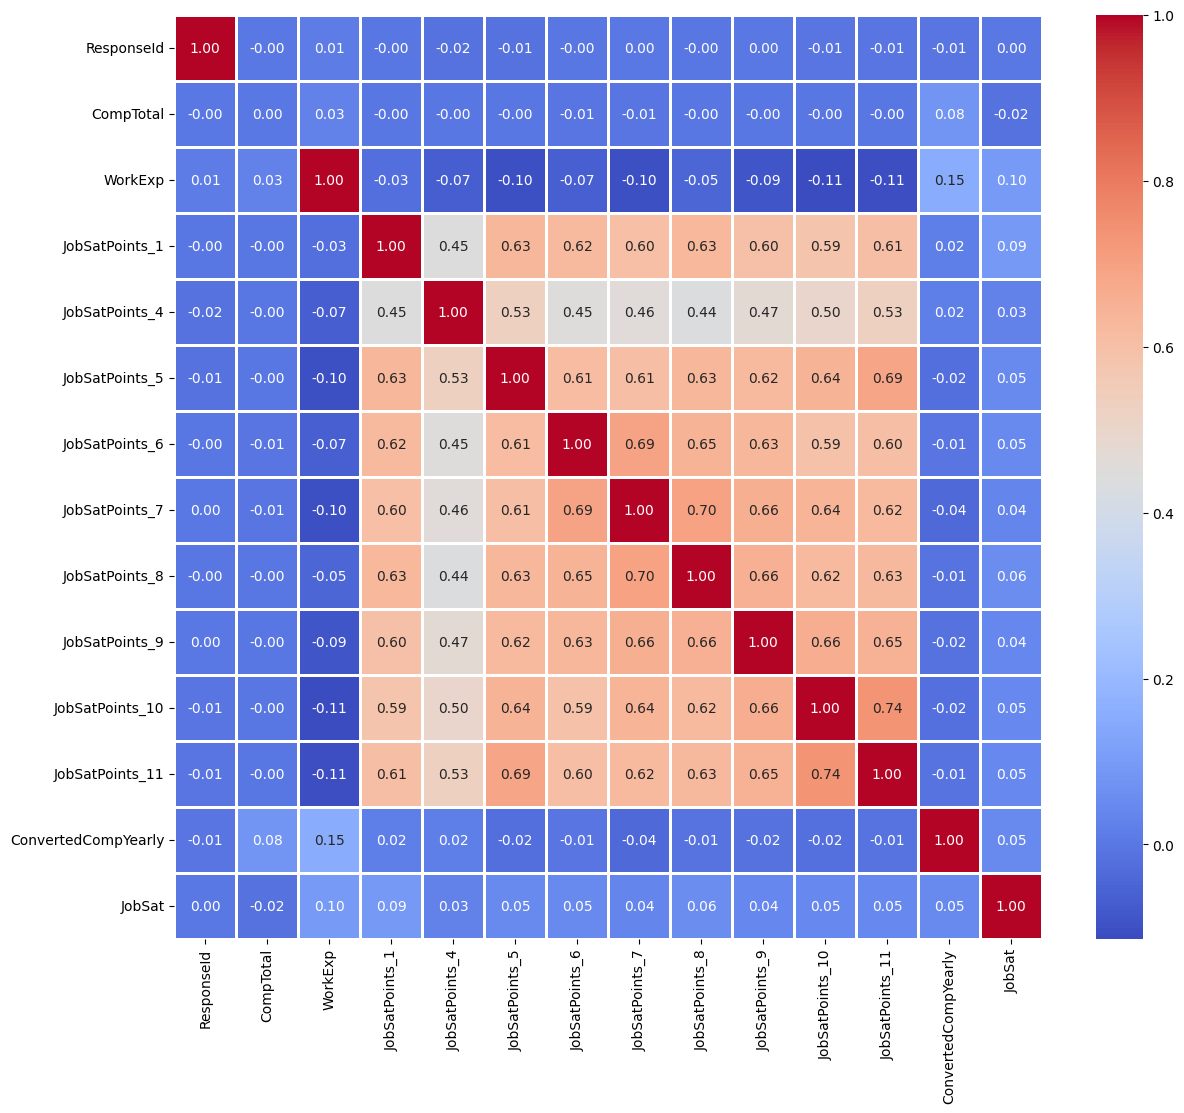

In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=1)
plt.show()

Since all numeric columns do not appear to greatly correlate with "ConvertedCompYearly",
we can make prediction of yearly compensation using these columns. One notice is that
the column "CompTotal" contains the compensations in different currency, so we can drop
this column

In [7]:
df.shape

(65437, 114)

In [8]:
# Drop the columns "ResponseId" and "CompTotal" from numeric_df
numeric_df.drop(['ResponseId', 'CompTotal'], axis = 1, inplace = True)

In [9]:
numeric_df

,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
65432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [10]:
# Here we deal with outliers, which may cause our model to predict poorly
outlier_columns = numeric_df.columns
outlier_columns

# Boxplot approach

for column in outlier_columns:
    
    lower_quartile = numeric_df[column].quantile(0.25)
    upper_quartile = numeric_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = numeric_df[(numeric_df[column] < min_border) | (numeric_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    numeric_df.drop(outliers, inplace = True)

276 outliers detected in column WorkExp
2768 outliers detected in column JobSatPoints_1
2367 outliers detected in column JobSatPoints_4
1651 outliers detected in column JobSatPoints_5
383 outliers detected in column JobSatPoints_6
367 outliers detected in column JobSatPoints_7
149 outliers detected in column JobSatPoints_8
372 outliers detected in column JobSatPoints_9
1448 outliers detected in column JobSatPoints_10
981 outliers detected in column JobSatPoints_11
487 outliers detected in column ConvertedCompYearly
376 outliers detected in column JobSat


In [11]:
numeric_df.shape

(53812, 12)

In [12]:
numeric_df_dropna = numeric_df.dropna(how = 'any')
numeric_df_dropna

,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
379,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91295.0,10.0
389,8.0,10.0,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,110000.0,10.0
392,18.0,40.0,0.0,10.0,30.0,5.0,10.0,0.0,0.0,5.0,161044.0,7.0
398,30.0,30.0,0.0,0.0,30.0,10.0,30.0,0.0,0.0,0.0,195000.0,5.0
415,16.0,50.0,10.0,0.0,25.0,0.0,15.0,0.0,0.0,0.0,79481.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9571.0,6.0
41175,4.0,10.0,5.0,5.0,20.0,25.0,5.0,15.0,10.0,5.0,15637.0,6.0
41184,30.0,10.0,15.0,10.0,20.0,10.0,20.0,15.0,0.0,0.0,170000.0,9.0
41186,1.0,20.0,5.0,5.0,20.0,25.0,15.0,5.0,5.0,0.0,12000.0,3.0


In [13]:
numeric_df_dropna.isnull().sum()

WorkExp                0
JobSatPoints_1         0
JobSatPoints_4         0
JobSatPoints_5         0
JobSatPoints_6         0
JobSatPoints_7         0
JobSatPoints_8         0
JobSatPoints_9         0
JobSatPoints_10        0
JobSatPoints_11        0
ConvertedCompYearly    0
JobSat                 0
dtype: int64

In [14]:
X = numeric_df_dropna.drop(['ConvertedCompYearly'], axis = 1)
y = numeric_df_dropna['ConvertedCompYearly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_preds = model.predict(X_test)
print(r2_score(y_test, y_test_preds))  
print(mean_squared_error(y_test, y_test_preds))

0.23524647126624187
2273736703.006329


From the results above, we see that the prediction is quite poor and we're missing a lot!
Let take a quick glimpse of how bad the predictions are...
The result suggests that only near 23.5% of the variability of yearly compensation can be explained
by these numeric variables. If we can get a quick look at the shape of numeric_df_dropna, which
is 9466 rows after we dropped missing values, only about 15% of the original data.

So one remedy for this poor prediction is to take into account the categorical variables. But first
let's look at how far our predictions are from the actual values. 

In [15]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), 
                                       y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'predicted']
preds_vs_act['difference'] = preds_vs_act['actual'] - preds_vs_act['predicted']
preds_vs_act.head()

,actual,predicted,difference
0,128129.0,74635.074021,53493.925979
1,187000.0,108891.940477,78108.059523
2,107406.0,92013.630439,15392.369561
3,77763.0,87916.895829,-10153.895829
4,152865.0,66731.718836,86133.281164


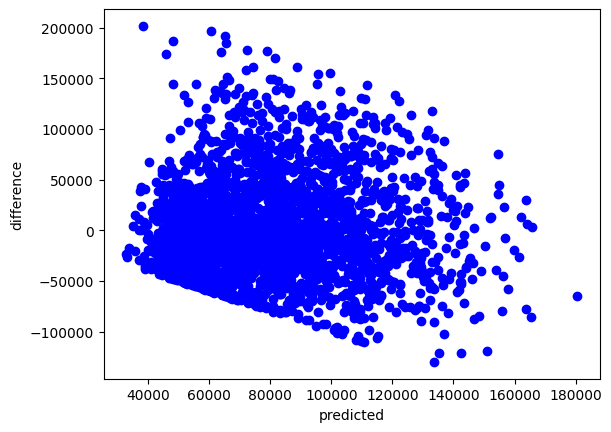

In [16]:
plt.plot(preds_vs_act['predicted'], preds_vs_act['difference'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

It seems that there is an decreasing trend in difference as the predicted compensation increases in the test data

Now we start looking at the categorical variables of the data

In [17]:
df.select_dtypes(include=['object']).head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy
3,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy
4,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy


In [19]:
# Create a dataframe holding all the categorical variables of the data
categorical_df = df.select_dtypes(include = ['object']).copy()
print(len(categorical_df.columns))
print(len(df.columns))

100
114


In [20]:
df_dummied = pd.get_dummies(data = df, columns = categorical_df.columns, dummy_na = False, drop_first = True)
df_dummied.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [21]:
df_dummied.shape

(65437, 287654)

In [22]:
df_result = pd.concat([df_dummied, numeric_df_dropna], axis=1, join='inner')
df_result.shape

(9466, 287666)

In [23]:
df_result['ConvertedCompYearly'].head()['ConvertedCompYearly']

,ConvertedCompYearly,ConvertedCompYearly
379,91295.0,91295.0
389,110000.0,110000.0
392,161044.0,161044.0
398,195000.0,195000.0
415,79481.0,79481.0


In [24]:
df_result = df_result.iloc[:,~df_result.columns.duplicated()]
df_result.shape

(9466, 287654)

In [25]:
df_result = df_result.dropna(axis=1, how='any')
df_result.shape

(9466, 287654)

In [69]:
X = df_result.drop(['ConvertedCompYearly', 'ResponseId'], axis = 1)
y = df_result['ConvertedCompYearly']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_preds = model.predict(X_test)
print(r2_score(y_test, y_test_preds))  
print(mean_squared_error(y_test, y_test_preds))

0.5799258970774042
1248948674.1944633


In [27]:
print(r2_score(y_train, model.predict(X_train))) # overfitting
print(mean_squared_error(y_train, model.predict(X_train)))

0.9999999999794504
0.06161539535633684


In [62]:
reduce_X = X.iloc[:, np.where((X.sum() > 5000) == True)[0]]
reduce_X.shape

(9466, 17)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_preds = model.predict(X_test)
print(r2_score(y_test, y_test_preds))  
print(mean_squared_error(y_test, y_test_preds))
print(r2_score(y_train, model.predict(X_train)))
print(mean_squared_error(y_train, model.predict(X_train)))

0.236221019951929
2270839211.157965
0.21147214485733212
2364303402.3794055


In [40]:
def optimal_model(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, 
                                                            test_size = test_size, 
                                                            random_state=random_state)

        #fit the model and obtain pred response
        model = LinearRegression() 
        model.fit(X_train, y_train)
        y_test_preds = model.predict(X_test)
        y_train_preds = model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, 
                                                        test_size = test_size, 
                                                        random_state=random_state)

    #fit the model
    model = LinearRegression() 
    model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, model, X_train, X_test, y_train, y_test

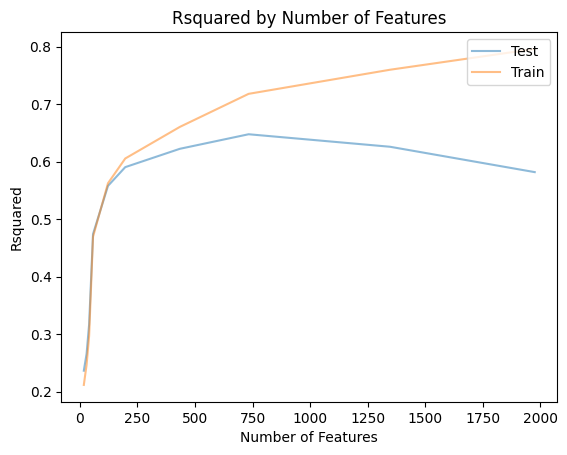

In [64]:
cutoffs = [5000, 3500, 2500, 2000, 1000, 500, 200, 100, 50, 30]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = optimal_model(X, y, cutoffs)

In [72]:
print(X_train.shape)
print(max(r2_scores_test)) # The best r2 score is around 65%
print(max(r2_scores_train))

(6626, 733)
0.6475432102573407
0.7959877020559116


In [70]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)

coefs_df.sort_values('abs_coefs', ascending=False).head(25)

,est_int,coefs,abs_coefs
210,Country_Israel,71152.737564,71152.737564
220,Country_United States of America,70019.881999,70019.881999
227,Currency_GBP\tPound sterling,43129.208820,43129.208820
217,Country_Switzerland,33114.006529,33114.006529
224,Currency_CHF\tSwiss franc,33113.936131,33113.936131
213,Country_Poland,30313.497831,30313.497831
202,Country_Australia,27634.178648,27634.178648
230,Currency_PLN\tPolish zloty,-27513.166087,27513.166087
228,Currency_ILS\tIsraeli new shekel,-25902.232947,25902.232947
720,Industry_Higher Education,-23436.331444,23436.331444


In [ ]:
## It seems that Country where developers work is the top indicator for yearly compensation
## The second factor is the level of education of developers. It appears that AI tool developers
## used to work with also contribute to how much they earn per year.